<h1>Proof of Concept</h1>
<li>Prove the need</li>
<li>Map Pain Points to Solutions</li>
<li>Prototype your Solution & Test</li>
<li>Create a Minimum Viable Product</li>
<li>Demo to Client & Get Feedback</li>
<li>Design a Roadmap</li>

<h1>Prove the need</h1>

The customer needs a method to predict cancellation rates to help decision-making. Cancellation rates are crucial for hotels. If the rate too high, the hotel may suffer from losses. A high cancellation rate means that the hotel may have higher vacancy rates and fewer guests. Therefore, by predicting cancellation rates, the hotel could arrange rooms, food, or staff in advance and create better performance.

<h1>Map Pain Points to Solutions</h1>

<h2>Pain Points</h2>
<li>High vacancy rate due to high cancellation rate</li>
<li>Long idle time to employee due to high cancellation rate</li>
<li>Overprepared food due to high cancellation rate</li>
<li>High operation cost</li>

<h2>Solutions</h2>
<li>Predict cancellation rates to arrange rooms, staff, food and services in advance</li>
<li>Identify the factors that influence the cancellations</li>
<li>Discuss plans to reduce the cancellation rates</li>

<h1>Prototype your Solution & Test</h1>

<img src="Dashboard.png"/>

<h2>Analyze Requirements</h2>

The customer needs a way to predict cancellation rate of the hotel. Therefore, we need to pull booking data out from the database and train the data through several models to find a best model to predict the rate accurately.

<h2>Design</h2>

<li>Query data out from MS SQL Server by T-SQL</li>
<li>Exploratory Data Analysis</li>
<li>Data preprocessing</li>
<li>Train data by machine Learning Models</li>
<li>Model selections</li>
<li>Tune models</li>
<li>Visualize the information</li>

<h2>Coding / Implementation</h2>

<h3>1. Quick look at the data</h3>
<li>Basic Information</li>
<li>Descriptive Statistical Visualization Analysis</li>

<h3>2. Data Preprocessing</h3>
<li>Handling Outliers</li>
<li>Converting Imbalance Dataset to Balanced Dataset</li>

<h3>3. EDA</h3>
<li>Where do the guests come from?</li>
<li>How much do guests pay for a room per night?</li>
<li>How does the price per night vary over the year?</li>
<li>Which are the busiest month?</li>
<li>How long do people stay at the hotels?</li>
<li>Bookings by market segment</li>
<li>How many bookings were canceled?</li>
<li>Which month have the highest number of cancelations?</li>

<h3>4. Predict cancellations</h3>
<li>Which numerical features are most important?</li>

<h3>Data Preprocessing</h3>
<li>Handling Outliers</li>
<li>Converting Imbalance Dataset to Balanced Dataset</li>

In [60]:
'''Importing the Libraries'''
# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import seaborn as snb
#import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5 # Feature importance evaluation

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [61]:
'''Importing the dataset'''
data = pd.read_csv("hotel_bookings.csv")

<h3>Handling Outliers</h3>

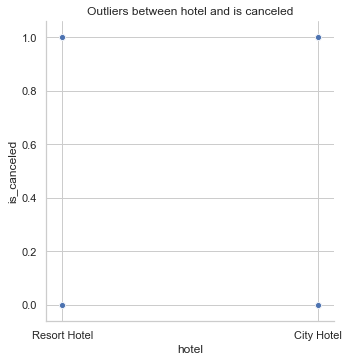

In [62]:
#Outliers between hotel and is_canceld (outliers: except for 0 and 1)
snb.relplot(x='hotel',y='is_canceled',data=data)
plt.title('Outliers between hotel and is canceled')
plt.show()

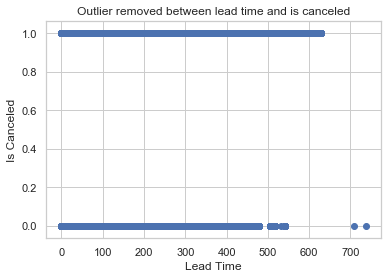

In [63]:
#Outliers between lead_time and is_canceld
plt.scatter(data['lead_time'],data['is_canceled'])
plt.xlabel('Lead Time')
plt.ylabel('Is Canceled')
plt.title('Outlier removed between lead time and is canceled')
plt.show()

In [64]:
#Remove outliers (lead_time > 600)
data=data.drop(data[data['lead_time']>600].index)

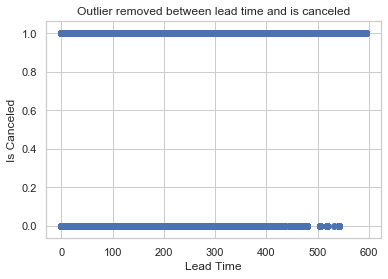

In [65]:
#Check Again
#Outliers between lead_time and is_canceld
plt.scatter(data['lead_time'],data['is_canceled'])
plt.xlabel('Lead Time')
plt.ylabel('Is Canceled')
plt.title('Outlier removed between lead time and is canceled')
plt.show()

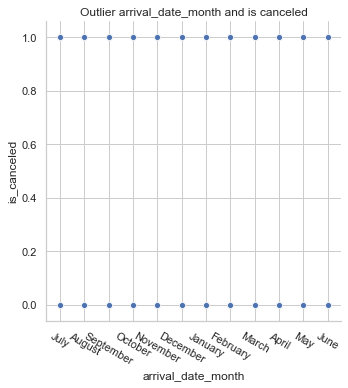

In [66]:
#Outliers between arrival_date_month and is_canceld
snb.relplot(x='arrival_date_month',y='is_canceled',data=data)
plt.title('Outlier arrival_date_month and is canceled')
#plt.figure(figsize=(1,1))
plt.xticks(rotation=-30) 
plt.show()

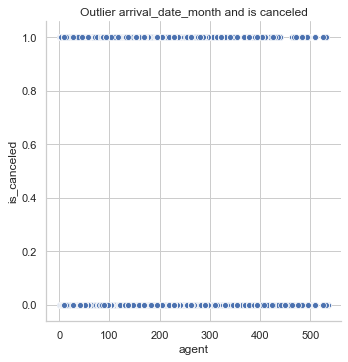

In [67]:
#Outliers between agent and is_canceld
snb.relplot(x='agent',y='is_canceled',data=data)
plt.title('Outlier arrival_date_month and is canceled')
plt.show()

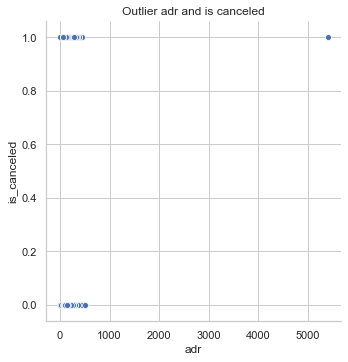

In [68]:
#Outliers between adr and is_canceld
snb.relplot(x='adr',y='is_canceled',data=data)
plt.title('Outlier adr and is canceled')
plt.show()

In [69]:
#Remove outliers (adr > 900)
data=data.drop(data[data['adr']>900].index)

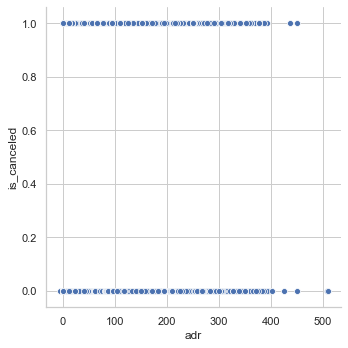

In [70]:
#Chekc again
snb.relplot(x='adr',y='is_canceled',data=data)

In [71]:
#Remove outliers (adr > 420)
data=data.drop(data[data['adr']>420].index)

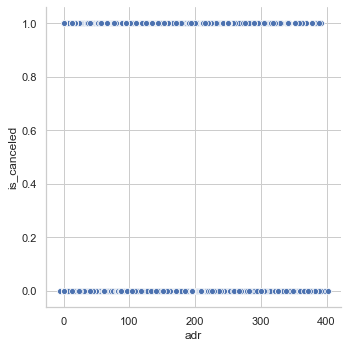

In [72]:
#Check it again
snb.relplot(x='adr',y='is_canceled',data=data)

In [73]:
# check for missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16336
company         

In [74]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
data_cln = data.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
data_cln["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(data_cln.loc[data_cln["adults"]
                   + data_cln["children"]
                   + data_cln["babies"]==0].index)
data_cln.drop(data_cln.index[zero_guests], inplace=True)

In [75]:
#Check Missing value ratios
d1 = data.copy()
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nChildren: {}\nAgent: {}\nCountry: {}'.format(perc_mv(data, d1['company']),perc_mv(data, data['children']),       
                                                                          perc_mv(data, d1['agent']),
                                                                          perc_mv(data, d1['country'])))

Missing value ratios:
Company: 94.29954040725956
Children: 0.003354691536113254
Agent: 13.70056023348653
Country: 0.4092723674058171


In [76]:
#Drop column 'Company' as the missing value is about 94%
data_cln = data_cln.drop(['company'], axis = 1)

In [77]:
#I assume the missing value in column 'Children' means no children, so I set those missing values to 0
data_cln['children'] = data_cln['children'].fillna(0)

In [78]:
# See how many columns and rows left
data_cln.shape

(119056, 31)

In [79]:
#Check missing value again to see if there's any missing values left
data_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

<h3>Converting Imbalance Dataset to Balanced Dataset</h3>

In [80]:
# Separating booking class distribution canceled and non-canceled dataset

booking_non_canceled=(data_cln['is_canceled'].value_counts()[0]/len(data_cln))*100.0
booking_canceled=(data_cln['is_canceled'].value_counts()[1]/len(data_cln))*100.0

print('Booking non canceled dataset ratio: %f'%(booking_canceled))
print('Booking canceled dataset ratio: %f'%(booking_non_canceled))
print('Booking non canceled dataset total rows: %f'%(data['is_canceled'].value_counts()[0]))
print('Booking canceled dataset total rows:%f'%(data_cln['is_canceled'].value_counts()[1]))

Booking non canceled dataset ratio: 36.995196
Booking canceled dataset ratio: 63.004804
Booking non canceled dataset total rows: 75160.000000
Booking canceled dataset total rows:44045.000000


Text(0.5, 1.0, ' Class Distribution \n( 0-Non Canceled || 1-Canceled)')

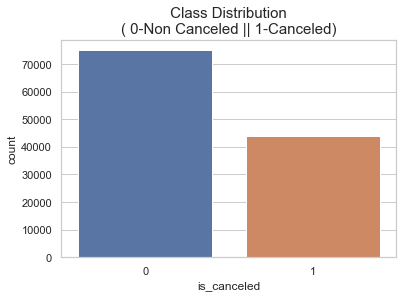

In [81]:
snb.countplot('is_canceled',data=data_cln)
plt.title(" Class Distribution \n( 0-Non Canceled || 1-Canceled)",fontsize=15)

In [82]:
# Booking Canceled data rows

booking_canceled_data=data_cln.loc[data_cln['is_canceled']==1]

# Booking non canceled data rows

booking_non_canceled_data=data_cln.loc[data_cln['is_canceled']==0][:41732]

# concat both canceled and non canceled dataset

concated_dataset=pd.concat([booking_canceled_data,booking_non_canceled_data])

# shuffle all balanced dataset

balanced_dataset=concated_dataset.sample(frac=1,random_state=5)

balanced_dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
84665,City Hotel,0,116,2016,February,10,28,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,134.0,0,Transient-Party,96.0,0,0,Check-Out,2016-03-02
48790,City Hotel,1,12,2016,March,14,30,1,4,3,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,161.0,0,0,Canceled,2016-03-26
66539,City Hotel,1,91,2017,April,16,21,1,2,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,135.0,0,0,Canceled,2017-01-26
25696,Resort Hotel,0,61,2016,July,28,5,0,2,3,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,0.0,0,Transient,222.0,1,2,Check-Out,2016-07-07
40661,City Hotel,0,34,2015,August,32,5,0,2,2,0.0,0,BB,ESP,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.0,0,0,Check-Out,2015-08-07


Text(0.5, 1.0, 'Class Distribution \n(0-Non Canceled Booking || 1- Canceled bookings)')

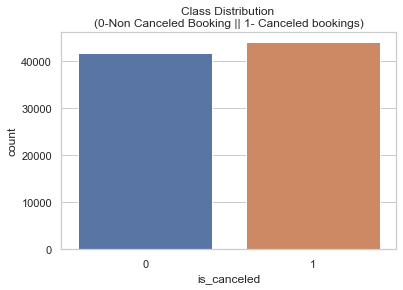

In [83]:
snb.countplot('is_canceled',data=balanced_dataset)
plt.title('Class Distribution \n(0-Non Canceled Booking || 1- Canceled bookings)')

<h3>EDA</h3>

In [84]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = balanced_dataset.loc[(data_cln["hotel"] == "Resort Hotel") & (balanced_dataset["is_canceled"] == 0)]
ch = balanced_dataset.loc[(data_cln["hotel"] == "City Hotel") & (balanced_dataset["is_canceled"] == 0)]

<h4> Where do the guests come from? </h4>

In [85]:
# get number of acutal guests by country
country_data = pd.DataFrame(balanced_dataset.loc[data_cln["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [99]:
top_10 = country_data.head(10)
top_10

,Number of Guests,Guests in %,country
PRT,15230,36.49,PRT
GBR,6424,15.39,GBR
ESP,4310,10.33,ESP
FRA,3119,7.47,FRA
DEU,1885,4.52,DEU
IRL,1829,4.38,IRL
ITA,928,2.22,ITA
CN,679,1.63,CN
NLD,673,1.61,NLD
BEL,657,1.57,BEL


In [87]:
# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

<h3>How much do guests pay for a room per night?</h3>
<n><n>
Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.

In [116]:
# Counting adults and children as paying guests only, not babies.
rh.loc[:,"adr_pp"] = rh.loc[:,"adr"] /(rh.loc[:,"adults"] + rh.loc[:,"children"])
ch.loc[:,"adr_pp"] = ch.loc[:,"adr"] /(ch.loc[:,"adults"] + ch.loc[:,"children"])

In [118]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} $ per night and person.
City hotel: {:.2f} $ per night and person."""
      .format(rh[:]["adr_pp"].to_numpy(dtype=np.int16).mean(), ch[:]["adr_pp"].to_numpy(dtype=np.int16).mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.17 $ per night and person.
City hotel: 52.27 $ per night and person.


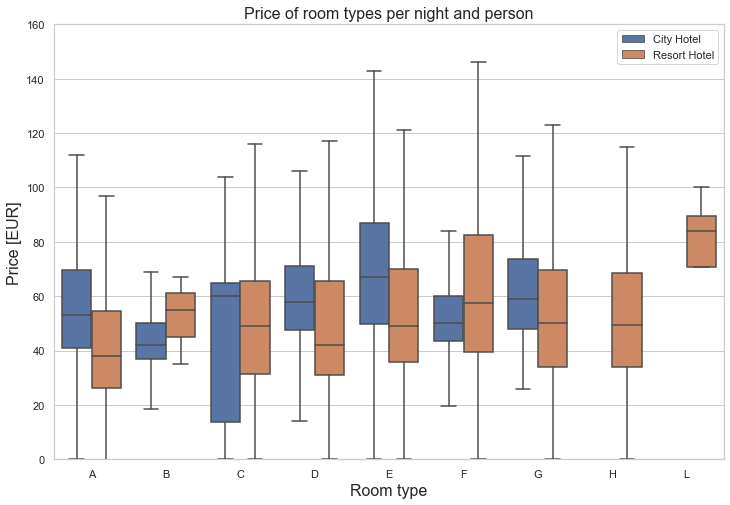

In [119]:
# normalize price per night (adr):
data_cln["adr_pp"] = data_cln["adr"] / (data_cln["adults"] + data_cln["children"])
data_guests = data_cln.loc[data_cln["is_canceled"] == 0] # only actual gusts
room_prices = data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation.
Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

<h4>How does the price per night vary over the year?</h4>
<br></br>
To keep it simple, I'm using the average price per night and person, regardless of the room type and meal.

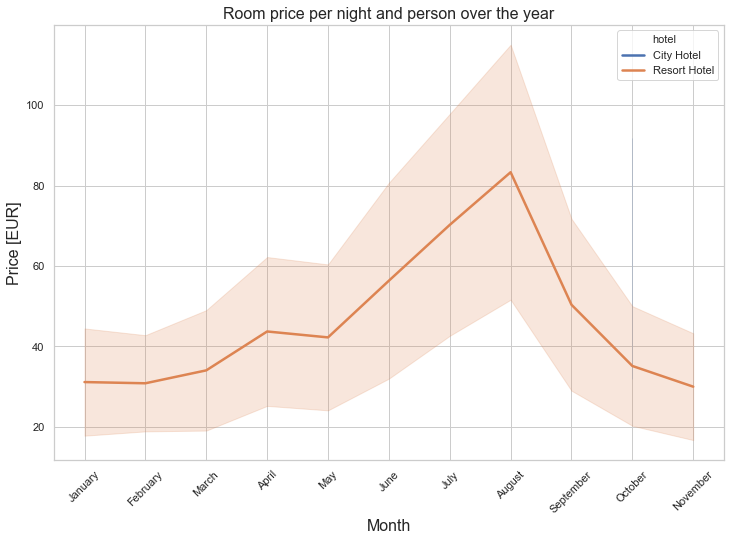

In [120]:
# grab data:
room_prices_mothly = data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).
The price of the city hotel varies less and is most expensive during spring and autumn.

<h4>Which are the most busy month?</h4>

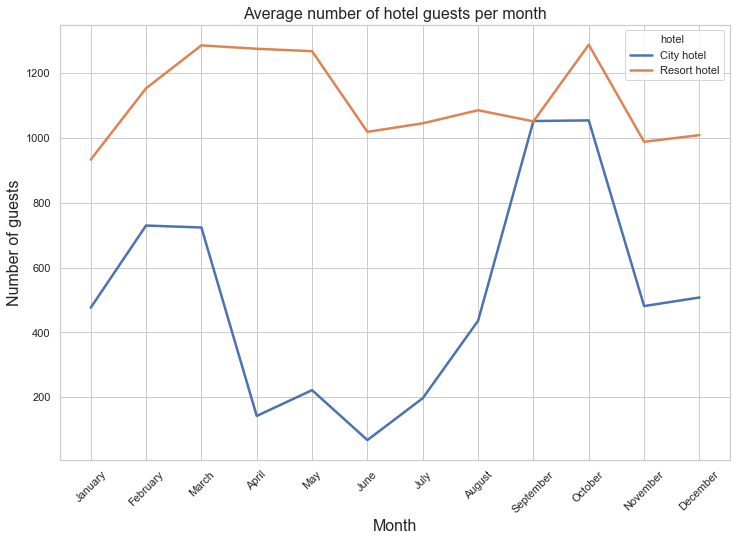

In [121]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

<h4>How long do people stay at the hotels?</h4>

In [134]:
# Create a DateFrame with the relevant data:
rh.loc[:,"total_nights"] = rh.loc[:,"stays_in_weekend_nights"] + rh.loc[:,"stays_in_week_nights"]
ch.loc[:,"total_nights"] = ch.loc[:,"stays_in_weekend_nights"] + ch.loc[:,"stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

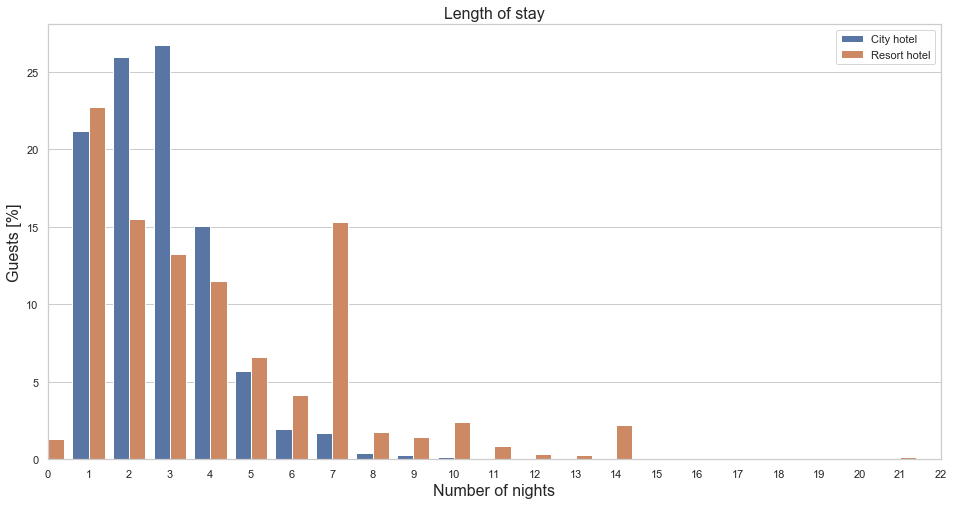

In [136]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()


In [137]:
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.76 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


For the city hotel there is a clear preference for 1-4 nights.
For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.

<h4>Bookings by market segment</h4>

In [138]:
# total bookings per market segment (incl. canceled)
segments=data_cln["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [151]:
segments.head(10)

Online TA        56366
Offline TA/TO    24189
Groups           19651
Direct           12586
Corporate         5284
Complementary      741
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

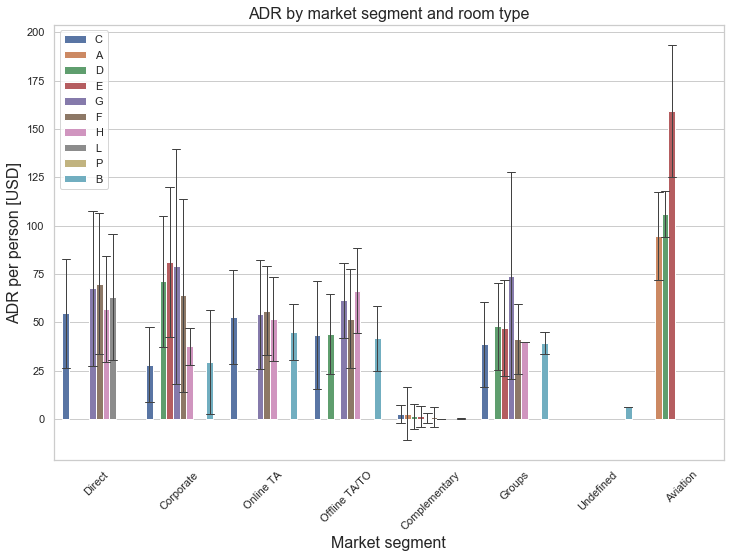

In [139]:
# price per night (ADR) and person based on booking and room.
# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=data_cln,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [USD]", fontsize=16)
plt.legend(loc="upper left")
plt.show()


On average, groups get the best prices and Airlines pay approximately twice as much.

<li>What are possible resons for the high prices paid by Airlines?</li>

In [140]:
# Summarize Relevant data:
Airline_data = data_cln.loc[data_cln["market_segment"]== "Aviation"][["is_canceled",
                                                                                "adults",
                                                                                "lead_time",
                                                                                "adr_pp",]].describe()

Non_Airline_data = data_cln.loc[data_cln["market_segment"]!= "Aviation"][["is_canceled",
                                                                                    "adults",
                                                                                    "lead_time",
                                                                                    "adr_pp",]].describe()

In [141]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
count,237.000000,237.000000,237.000000,235.000000
mean,0.219409,1.004219,4.443038,100.270979
std,0.414722,0.145494,4.607695,20.376689
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,95.000000
50%,0.000000,1.000000,3.000000,95.000000
75%,0.000000,1.000000,6.000000,110.000000
max,1.000000,2.000000,23.000000,193.500000


In [142]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,118819.000000,118819.000000,118819.000000,118672.00
mean,0.370252,1.857986,103.601756,inf
std,0.482874,0.578876,105.425742,NaN
min,0.000000,0.000000,0.000000,-3.19
25%,0.000000,2.000000,18.000000,37.50
50%,0.000000,2.000000,69.000000,49.50
75%,1.000000,2.000000,160.000000,66.00
max,1.000000,55.000000,594.000000,inf


Lead time for bookings from Aviation is very short: Mean 4 days vs. 104 days for other bookings.
Airlines NEED a place for their crews to stay.
Airline personel usually gets one room per person - more total rooms required compared to families.


<h4>How many bookings were canceled?</h4>

In [143]:
# absolute cancelations:
total_cancelations = data_cln["is_canceled"].sum()
rh_cancelations = data_cln.loc[data_cln["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = data_cln.loc[data_cln["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / data_cln.shape[0] * 100
rh_rel_cancel = rh_cancelations / data_cln.loc[data_cln["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / data_cln.loc[data_cln["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,045 (37 %)
Resort hotel bookings canceled: 11,115 (28 %)
City hotel bookings canceled: 32,930 (42 %)


<h4> Which month have the highest number of cancelations?</h4>

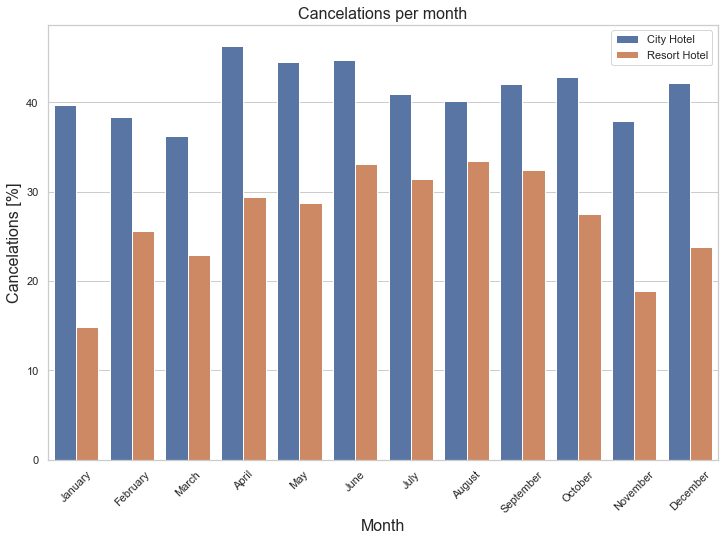

In [144]:
# Create a DateFrame with the relevant data:
res_book_per_month = data_cln.loc[(data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data_cln.loc[(data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data_cln.loc[(data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data_cln.loc[(data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
cancel_data["cancel_percent"] = cancel_data["Cancelations"] / cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
cancel_data["Month"] = pd.Categorical(cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()


For the City hotel the relative number of cancelations is around 40 % throughout the year.
For the Resort hotel it is highest in the summer and lowest during the winter.

<h3>4. Predict cancelations</h3>

<h4>Which numerical features are most important?</h4>

In [145]:
cancel_corr = data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.290046
total_of_special_requests         0.233820
required_car_parking_spaces       0.195298
booking_changes                   0.144002
previous_cancellations            0.110415
is_repeated_guest                 0.084573
agent                             0.081900
adults                            0.059876
previous_bookings_not_canceled    0.057270
days_in_waiting_list              0.054453
adr                               0.050206
babies                            0.032397
stays_in_week_nights              0.025282
company                           0.020642
arrival_date_year                 0.015691
arrival_date_week_number          0.008439
arrival_date_day_of_month         0.005877
children                          0.005477
stays_in_weekend_nights           0.000977
Name: is_canceled, dtype: float64

From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
However, to predict wheater or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.
I will also not include days_in_waiting_list and arrival_date_year.

The most important feature to exclude is the "reservation_status":

In [146]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75160
1            Canceled              42869
             No-Show                1207
Name: reservation_status, dtype: int64

Comparing different base models:

In [147]:
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [148]:

# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
   
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}")
    

DT_model cross validation accuarcy score: 0.8246 +/- 0.0018 (std) min: 0.822, max: 0.8268
RF_model cross validation accuarcy score: 0.8662 +/- 0.0017 (std) min: 0.8637, max: 0.8684
LR_model cross validation accuarcy score: 0.7949 +/- 0.0026 (std) min: 0.7914, max: 0.7988
XGB_model cross validation accuarcy score: 0.8465 +/- 0.0023 (std) min: 0.8432, max: 0.8487


In [149]:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8675 +/- 0.0019 (std) min: 0.8645, max: 0.8694


<h3>Evaluate Feature importance</h3>

In [150]:
# fit model(pipeline) so values can be accessed:
model_pipe.fit(X,y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first: 
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.145392,0.015094
1,deposit_type_Non Refund,0.133612,0.108477
2,adr,0.095843,0.003316
3,deposit_type_No Deposit,0.083856,0.105585
4,arrival_date_day_of_month,0.069713,0.002015
5,arrival_date_week_number,0.053944,0.002184
6,total_of_special_requests,0.051513,0.014054
7,agent,0.042949,0.005343
8,stays_in_week_nights,0.041786,0.002330
9,previous_cancellations,0.038645,0.013132


Looking at the three most important features:
<li>lead_time</li>
<li>deposit_type</li>
<li>adr</li>

<h2>Unit Testing</h2>

The cancellation predict is an unit function in the system. We'll acess updated data from the database to test the model to see if the accuracy could remain or be even better through the model.

<h2>Integration Testing</h2>

After completeing the unit testing, we'll do integration testing. To see if there's any impact may result due to the new function. By checking whether system is stable and other functions not be influenced. Also, we'll check if the data could keep integrity and updated both in the database and the system.

<h1>Create a Minimum Viable Product</h1>

After the testing, we'll add the function to the customer's booking analysis system. 

<h1>Demo to Client & Get Feedback</h1>

We'll show the client beta version of the system. The new function could let customer choose date interval, which connected to events and weekends database. After choosing the date interval, the client could see the cancellation rate of each date. Those information will be visualized and the client could click the rate to see the proportion of each factors.

After demostrating to the client, we'd like to hear feedback from our client to see if ther's any factors we haven't thought about or even any feedback about user interface.

<h1>Design a Roadmap</h1>

<li>Release beta version to the client</li>
<li>Collect feedback from users periodically</li>
<li>Improve the function according to the feedback</li>